In [5]:
import gde as gde
import gdeltdoc as gdd

In [6]:
# Uncomment when running for first time
#!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 12.2 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.8 MB 17.5 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 21.3 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 21.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 15.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


We can use GDeltDoc to query GDelt for articles on a given topic, using the keyword and domain arguments.

Lets look at coverage of the Kursk operation from sputnik globe, a Russian government linked publication

In [11]:
keyword = "kursk"
gd = gdd.GdeltDoc()

In [12]:
f = gdd.Filters(
    start_date="2020-02-01",
    end_date="2024-09-01",
    num_records=250,
    keyword=keyword,
    domain="sputnikglobe.com",
    # near = near(10, "arrest", "charge"),
)

In [13]:
art_df = gd.article_search(f)
print(f"{art_df.shape[0]} articles found!")

65 articles found!


We can now construct a graph of all the entities in the text of articles found

In [14]:
g = gde.entity_graph(
    art_df,
    html_tags={"class": "article__text"},
    keep_types=[
        "LOC",
        "NORP",
        "ORG",
        "PERSON",
        "PRODUCT",
    ],
)

100%|██████████| 65/65 [01:14<00:00,  1.15s/it]


In [ ]:
# Needs work
# sent_df = gde.sentiment_analyser(art_df, html_tags={"class":"article__text"})

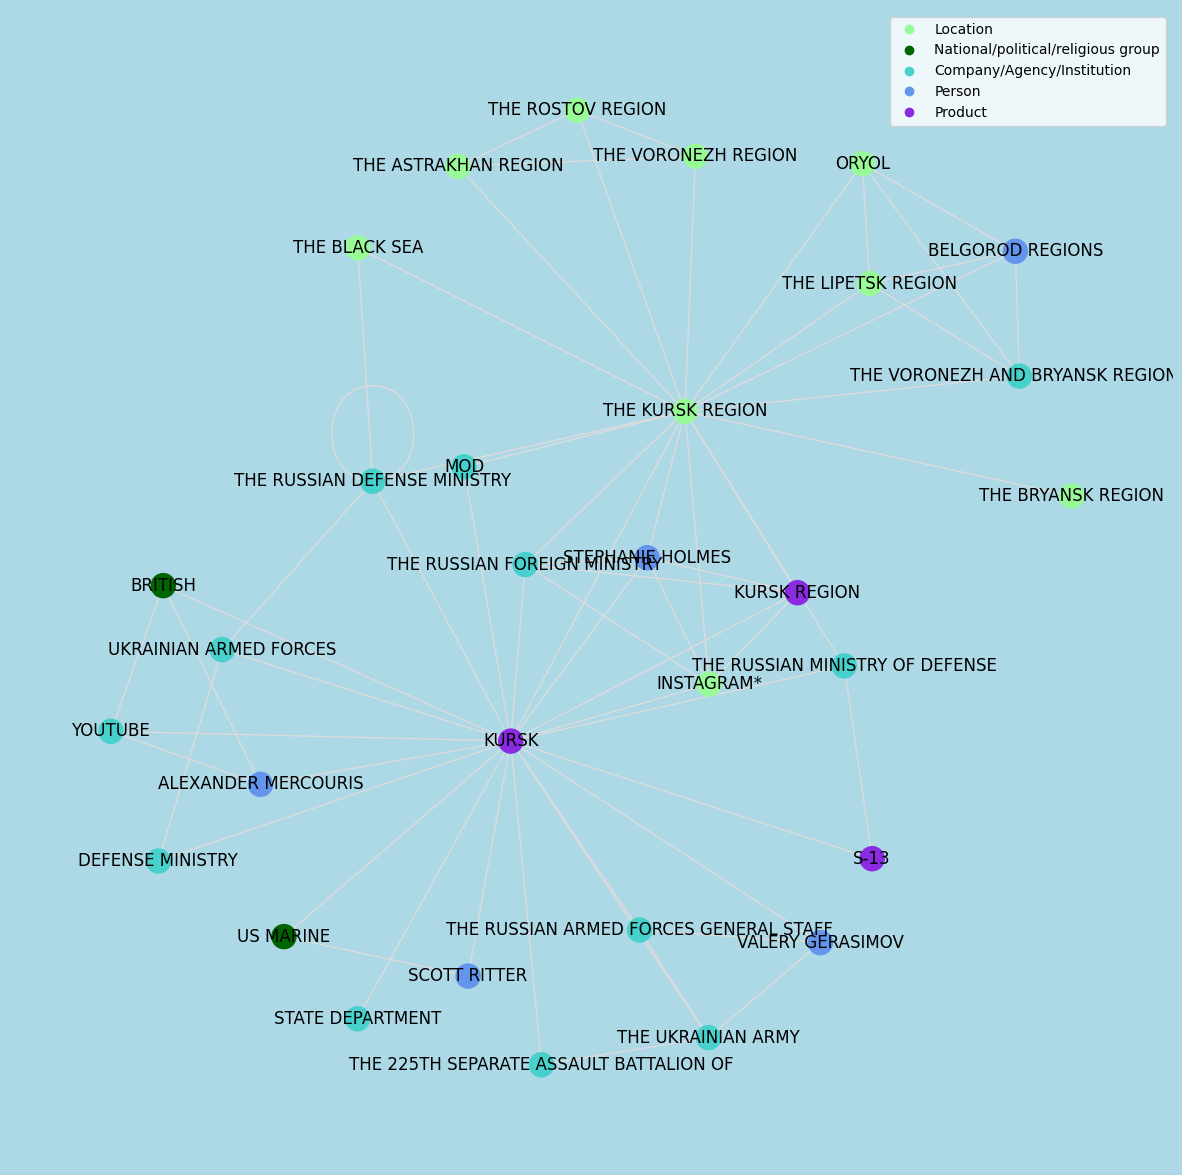

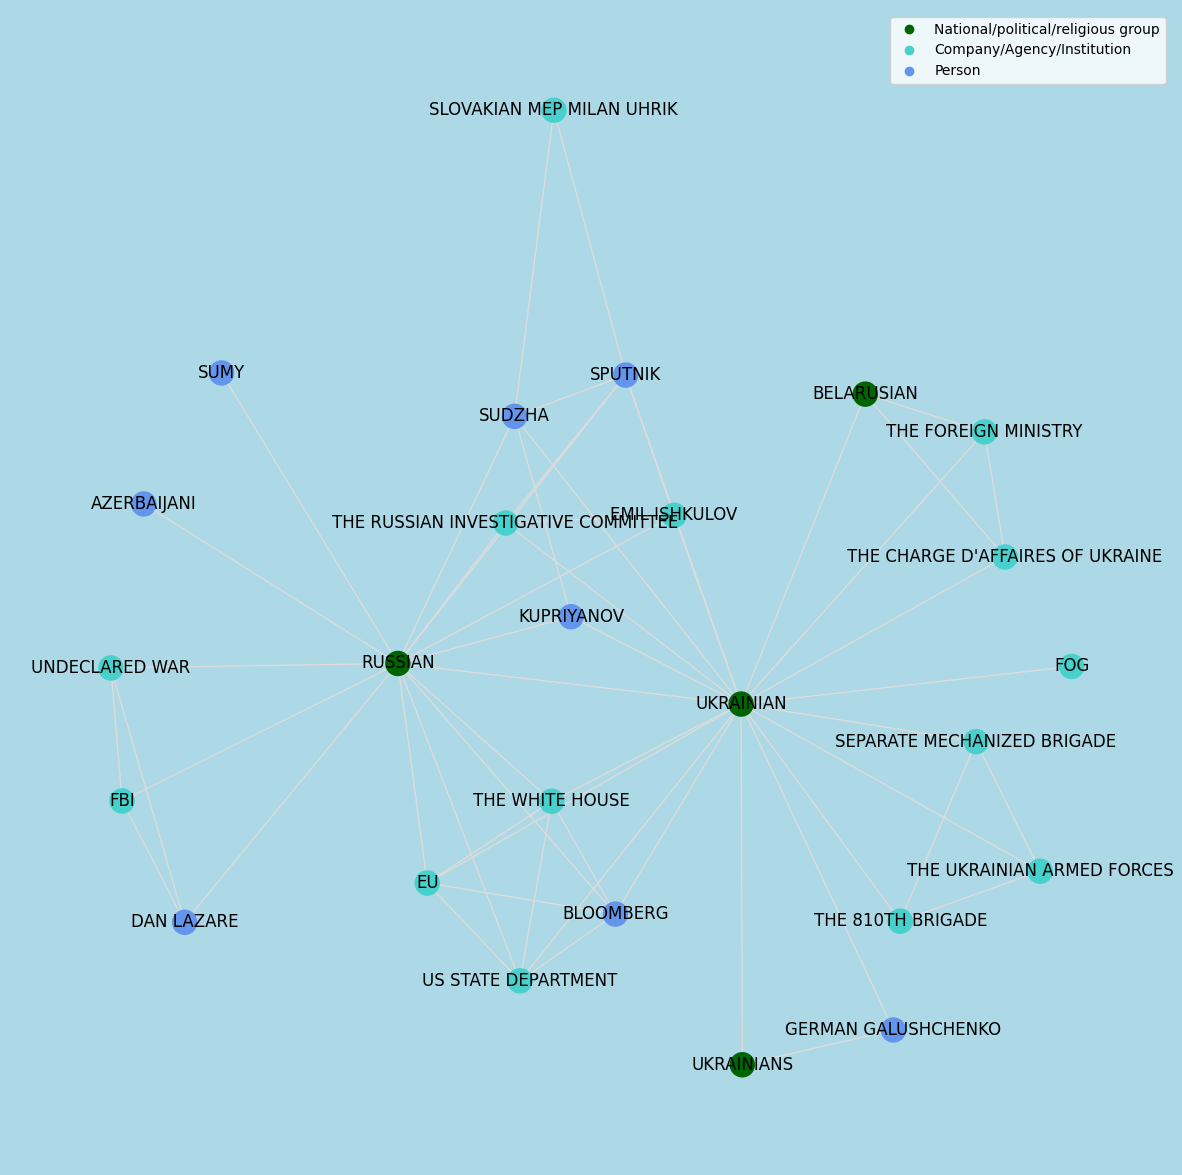

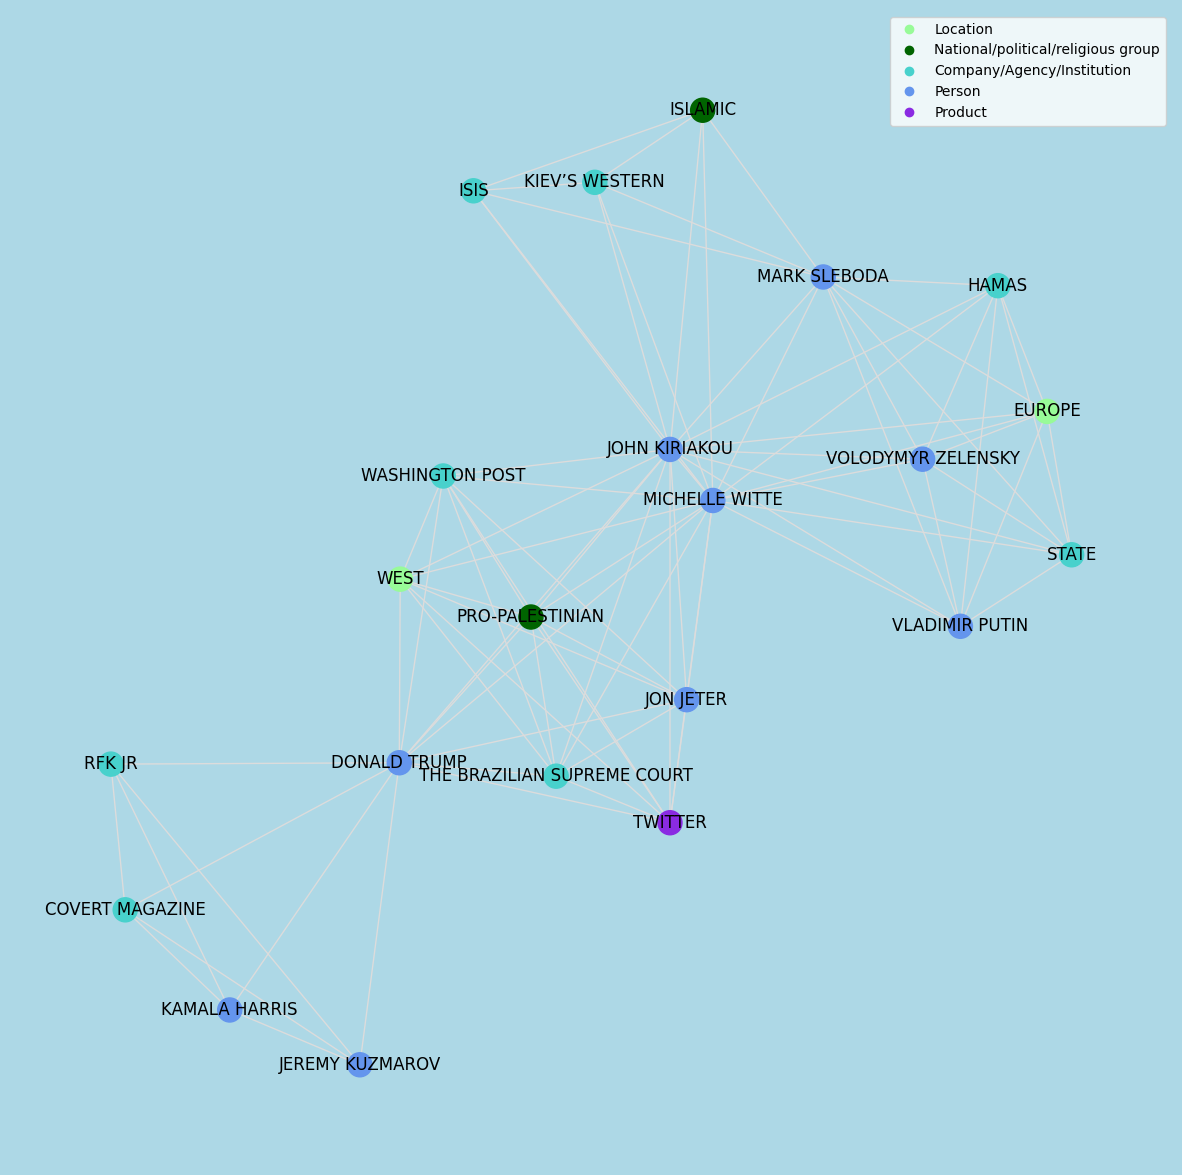

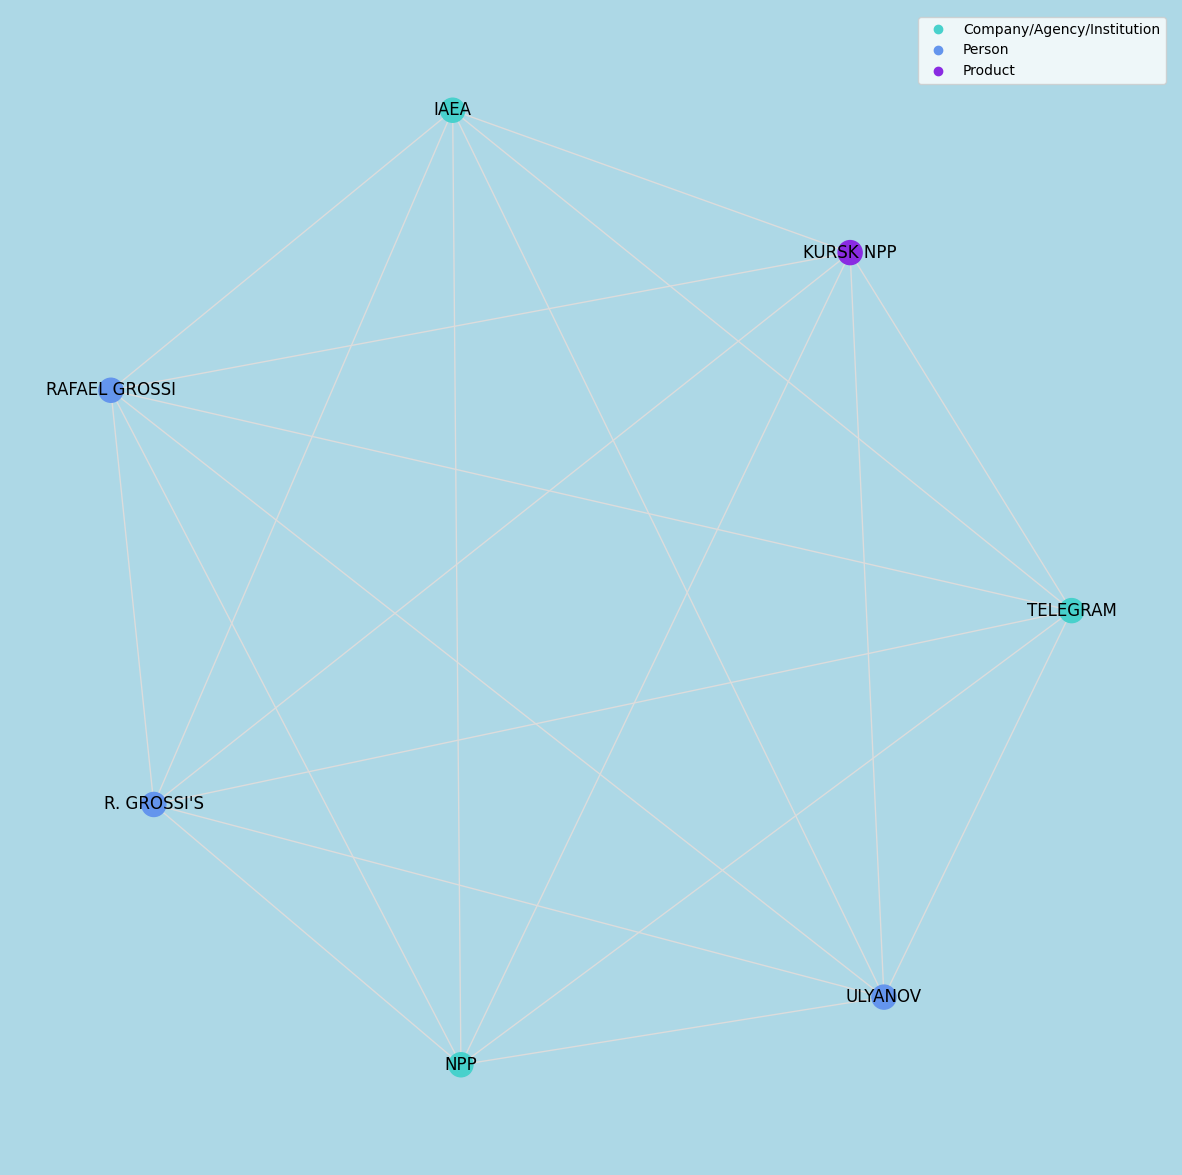

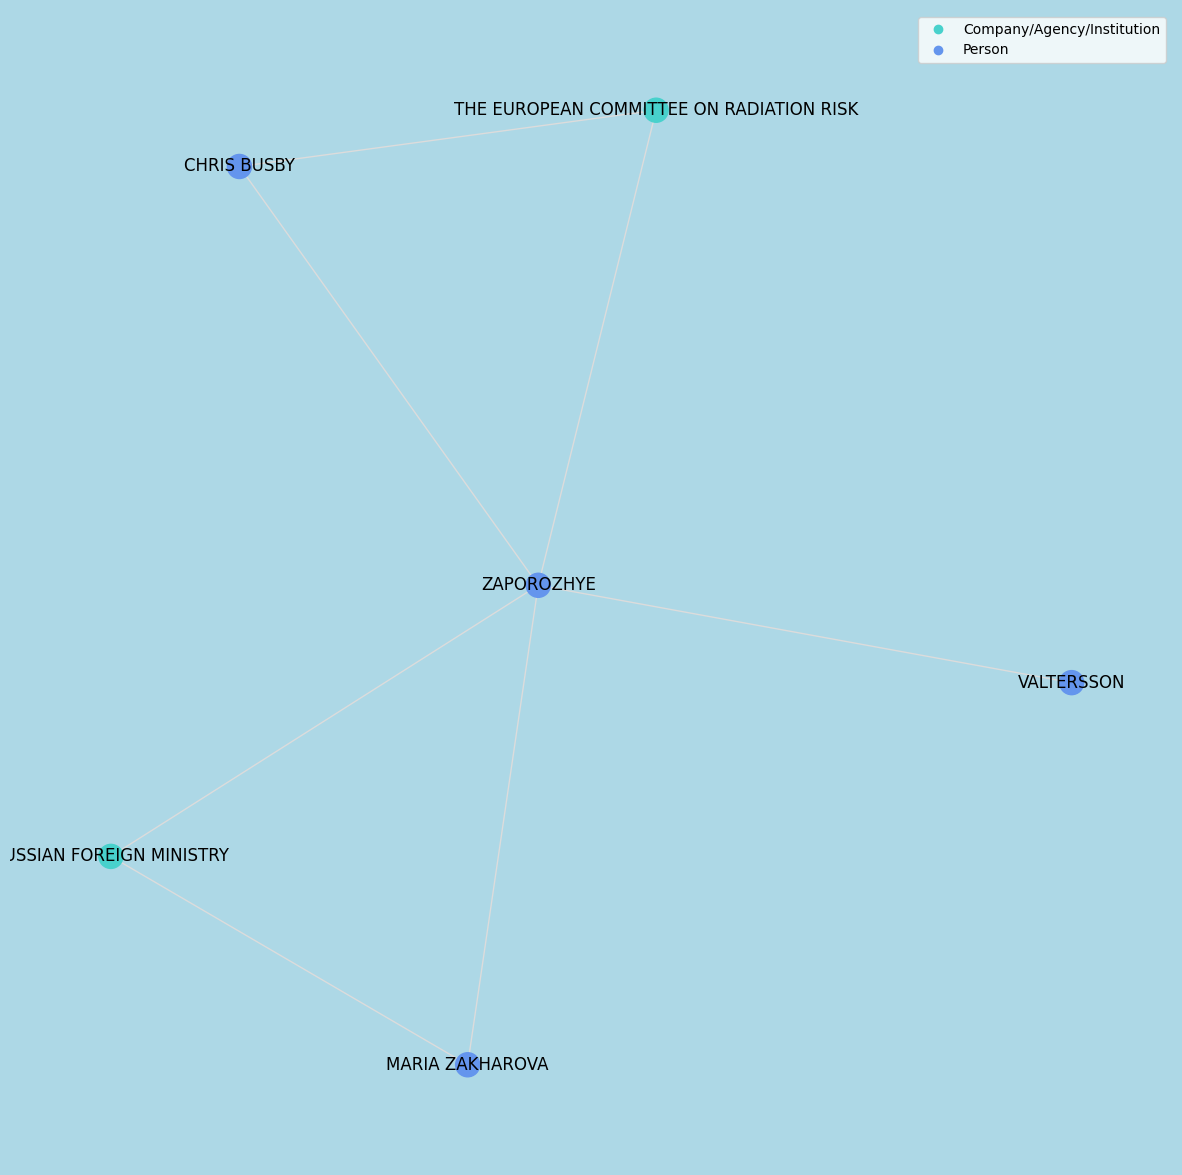

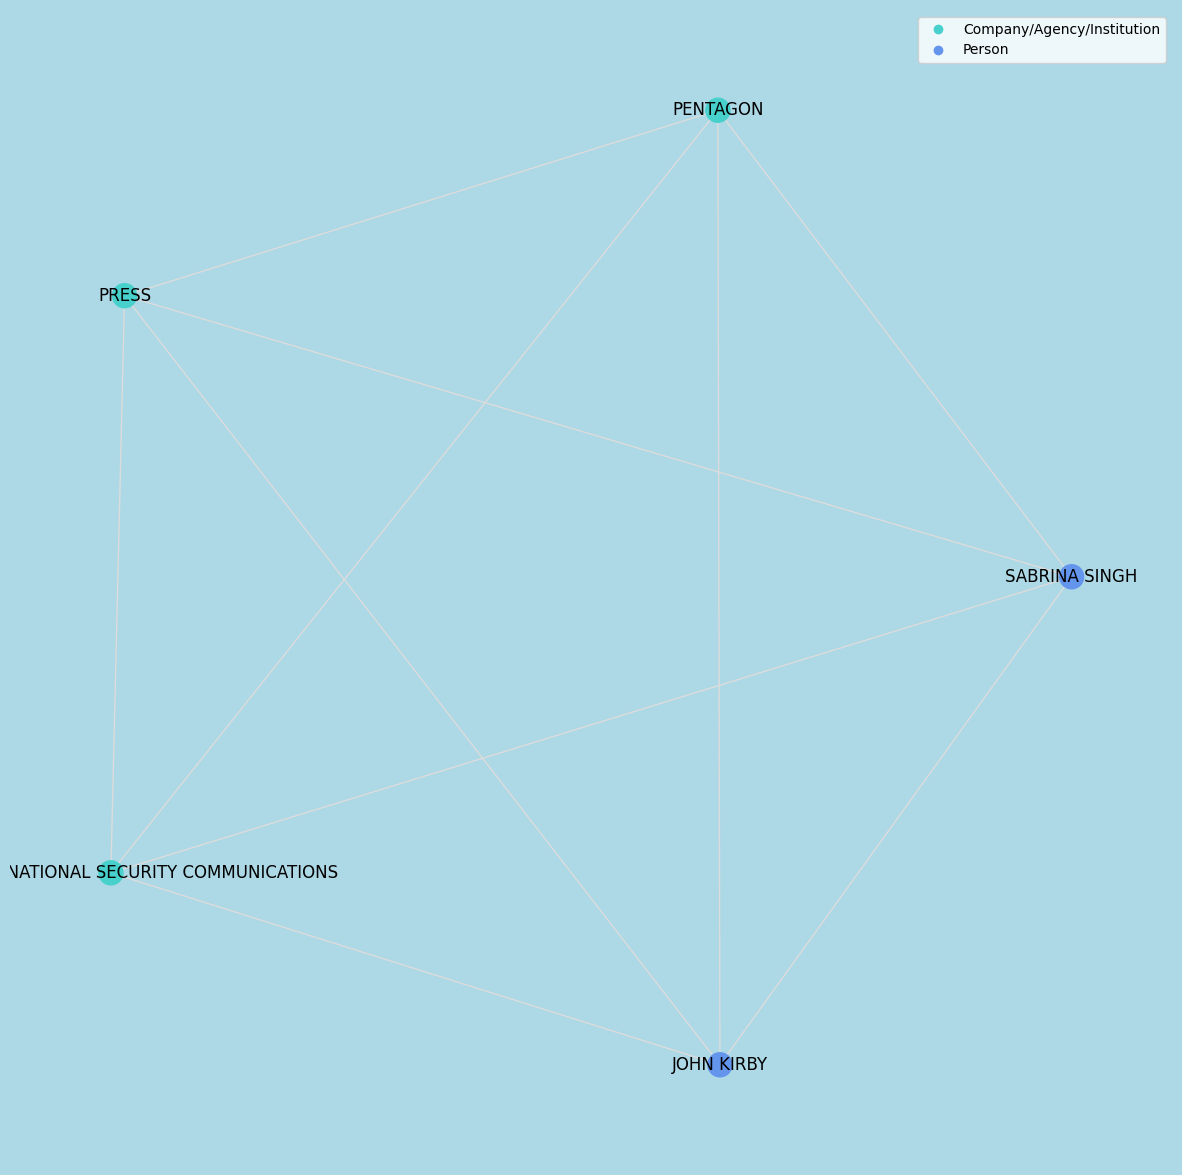

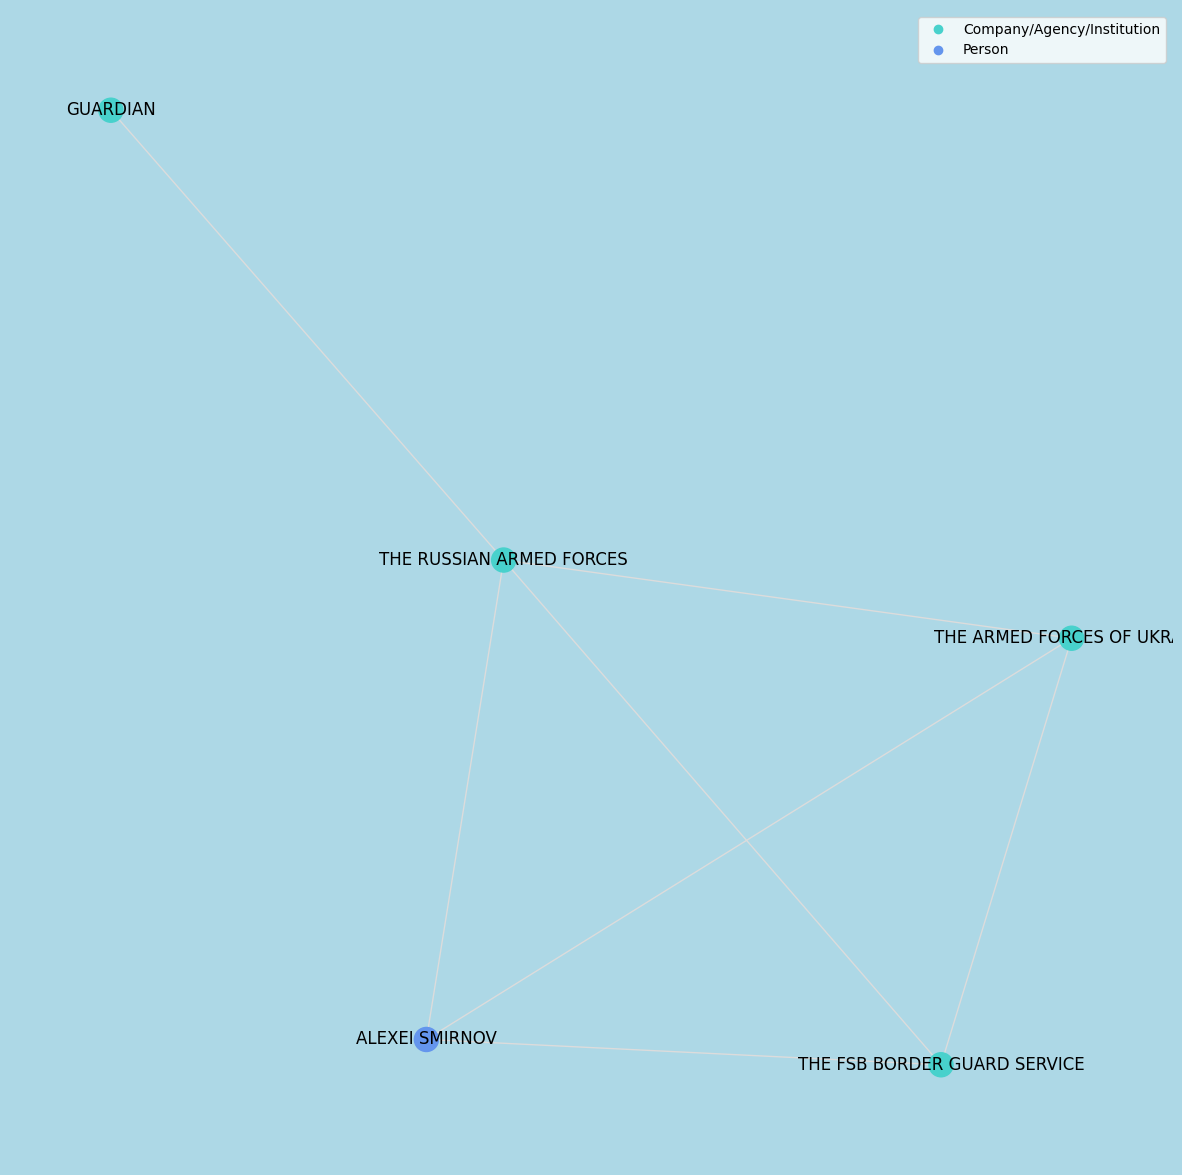

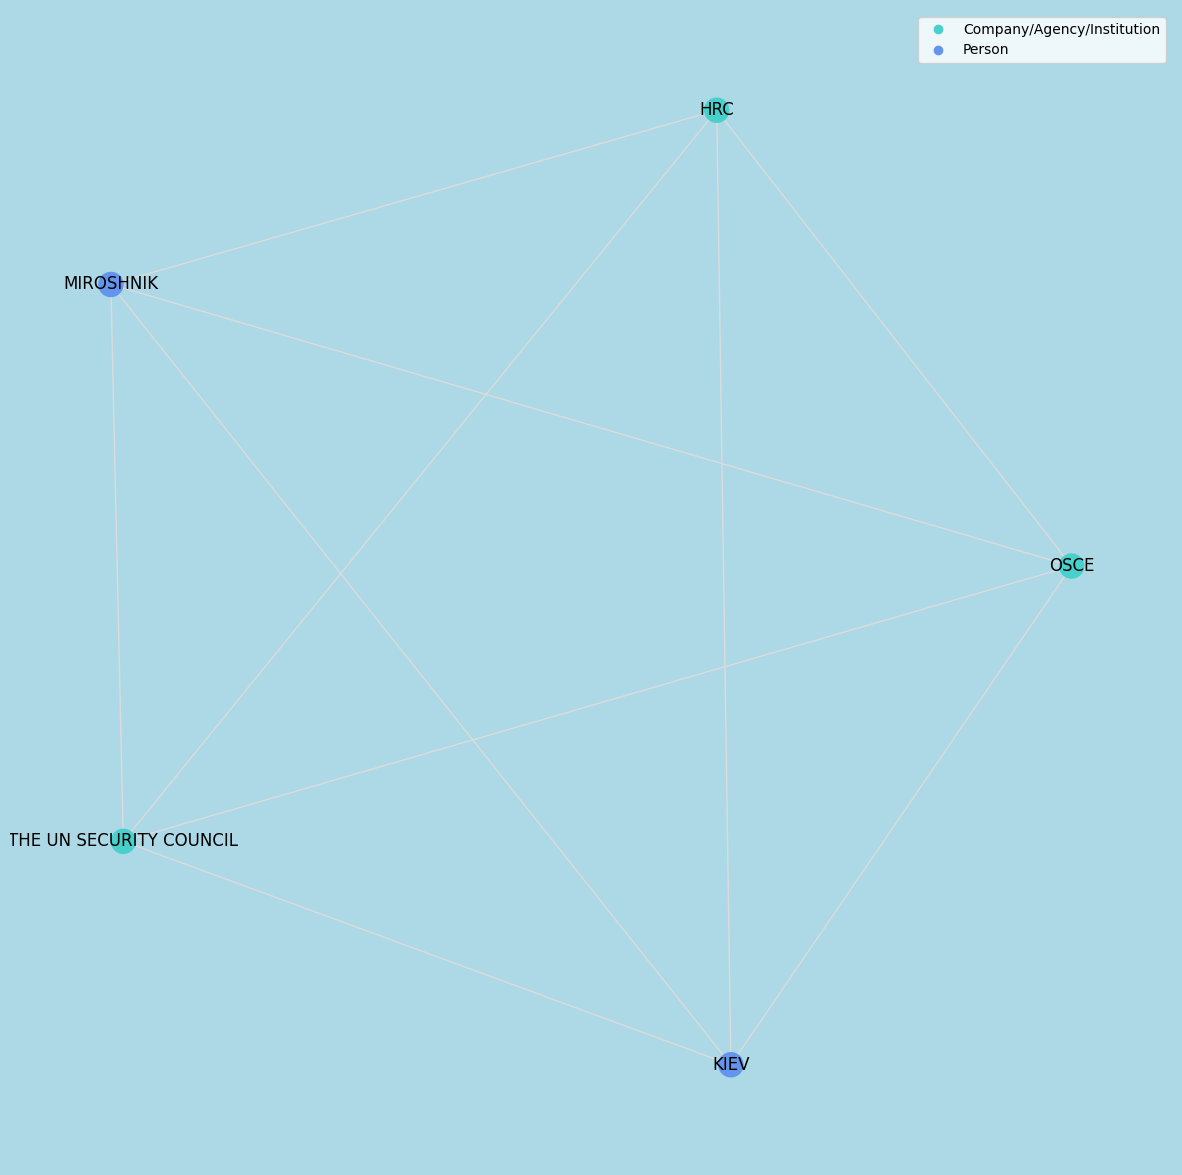

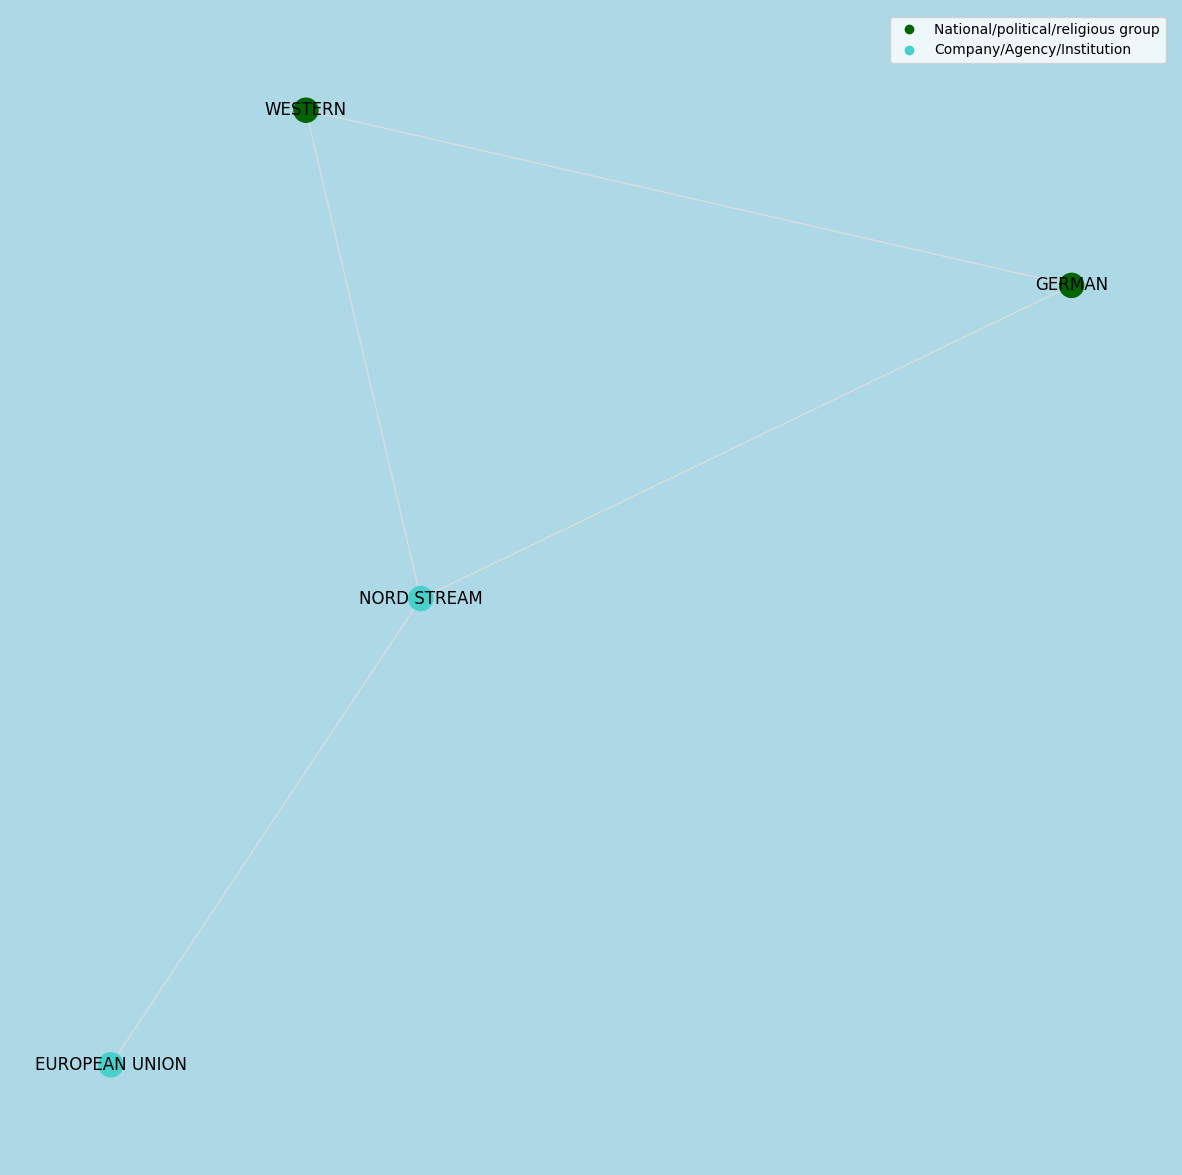

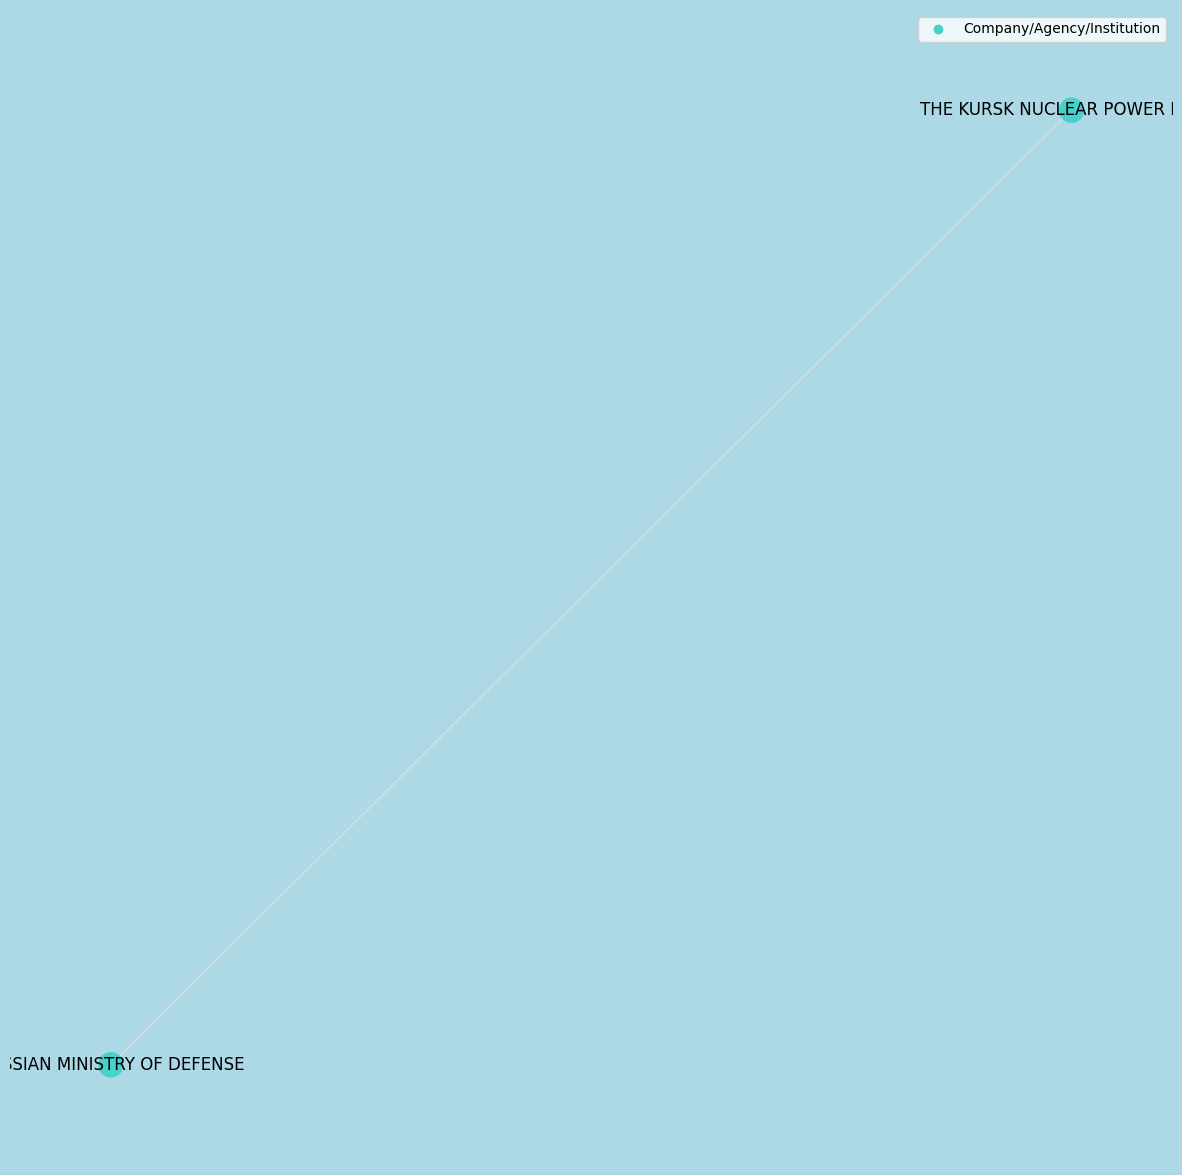

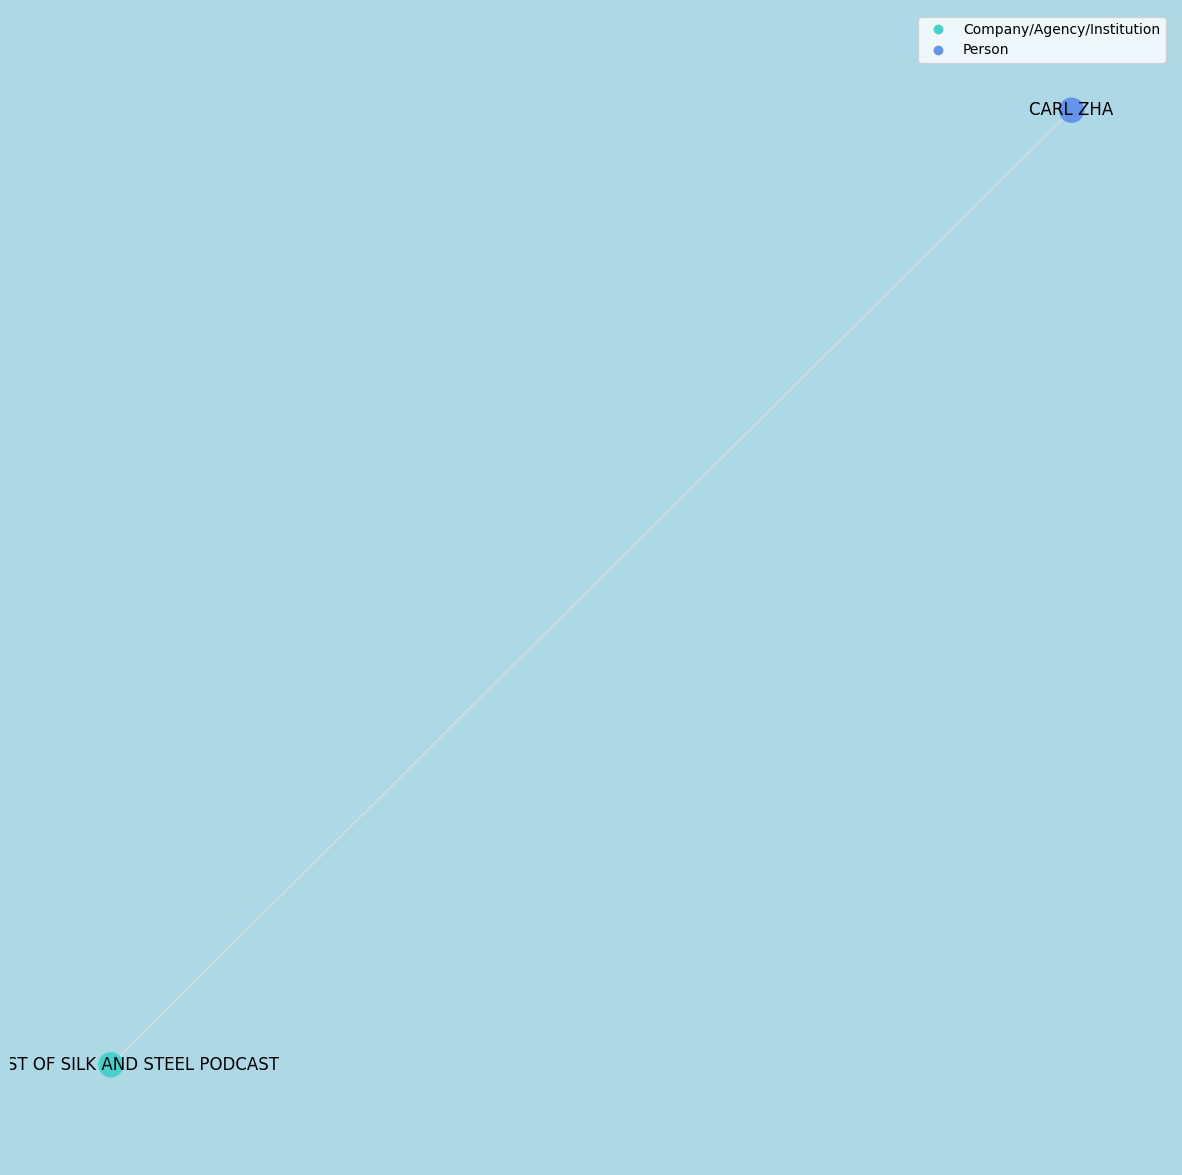

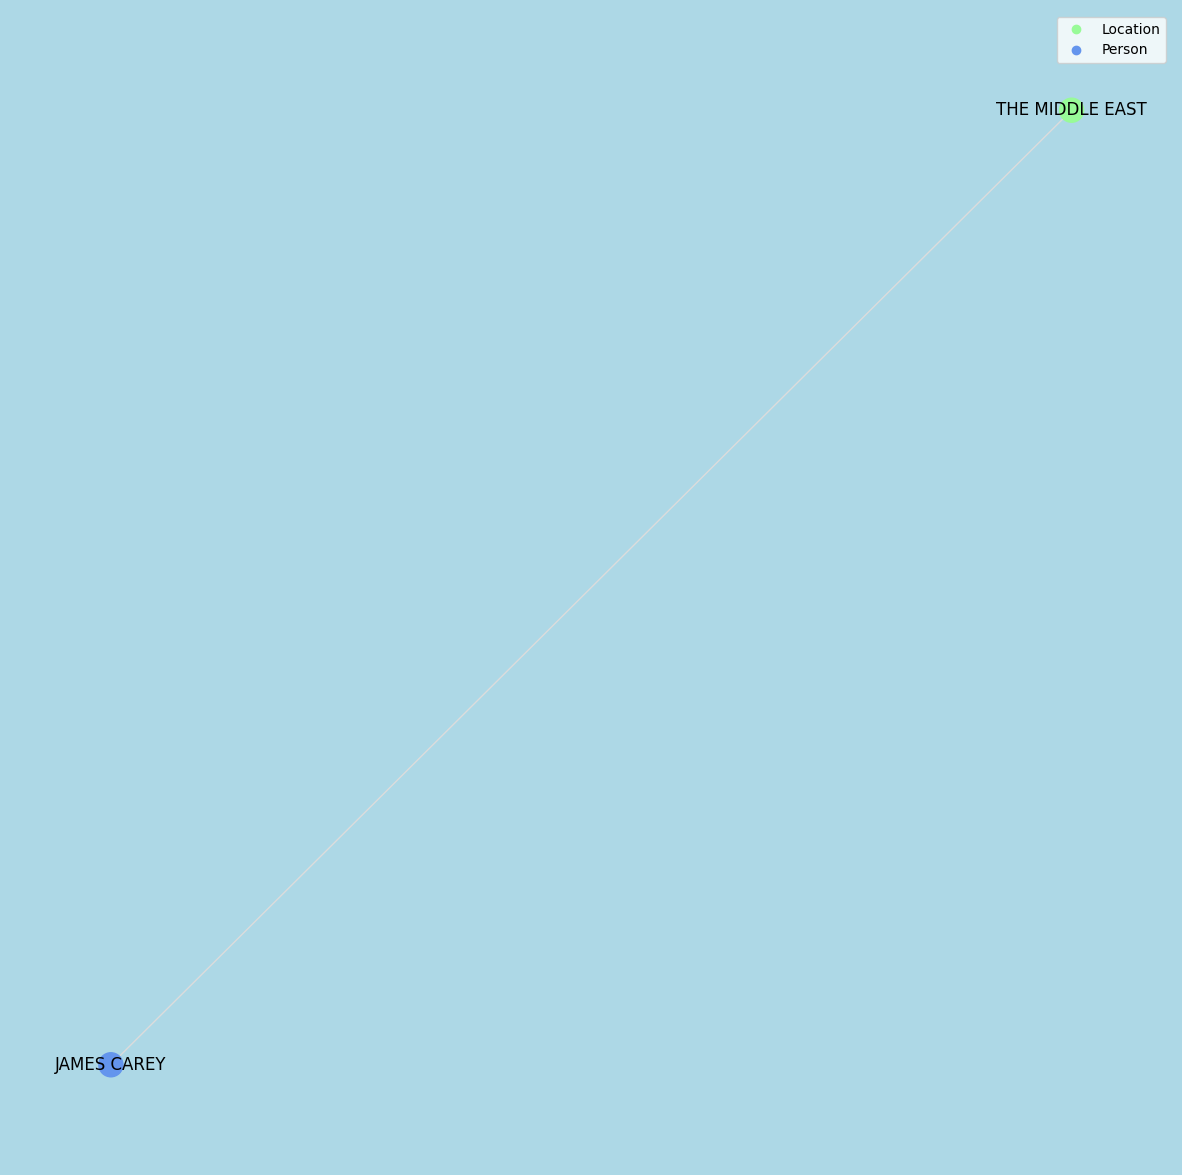

In [16]:
# Find communities within g, plot separately
gde.plot_all_communities(g)